In [82]:
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time, re
from bs4 import BeautifulSoup

import pandas as pd
URL="https://www.amazon.com/Mineral-Sunscreen-Titanium-Dioxide-Sensitive/product-reviews/B07KL5K96X/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"


reviewlist = []

def get_soup(url):
    driver = webdriver.Chrome()
    driver.get(URL)
    time.sleep(3)#Wait for Loading
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'lxml')
    return soup

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
            
    except:
        pass
    
for x in range(1,67):
    soup = get_soup(f'https://www.amazon.com/Mineral-Sunscreen-Titanium-Dioxide-Sensitive/product-reviews/B07KL5K96X/ref=cm_cr_arp_d_paging_btm_next_27?ie=UTF8&reviewerType=all_reviews%22&pageNumber={x}')
    print(f'Getting page: {x}')
    get_reviews(soup)
    print(len(reviewlist))

        
df = pd.DataFrame(reviewlist)
print('Fin.')

Getting page: 1
10
Getting page: 2
20
Getting page: 3
30
Getting page: 4
40
Getting page: 5
50
Getting page: 6
60
Getting page: 7
70
Getting page: 8
80
Getting page: 9
90
Getting page: 10
100
Getting page: 11
110
Getting page: 12
120
Getting page: 13
130
Getting page: 14
140
Getting page: 15
150
Getting page: 16
160
Getting page: 17
170
Getting page: 18
180
Getting page: 19
190
Getting page: 20
200
Getting page: 21
210
Getting page: 22
220
Getting page: 23
230
Getting page: 24
240
Getting page: 25
250
Getting page: 26
260
Getting page: 27
270
Getting page: 28
280
Getting page: 29
290
Getting page: 30
300
Getting page: 31
310
Getting page: 32
320
Getting page: 33
330
Getting page: 34
340
Getting page: 35
350
Getting page: 36
360
Getting page: 37
370
Getting page: 38
380
Getting page: 39
390
Getting page: 40
400
Getting page: 41
410
Getting page: 42
420
Getting page: 43
430
Getting page: 44
440
Getting page: 45
450
Getting page: 46
460
Getting page: 47
470
Getting page: 48
480
Getting pa

WebDriverException: Message: disconnected: not connected to DevTools
  (Session info: chrome=88.0.4324.150)


In [85]:
import sqlalchemy
import sqlite3
conn = sqlite3.connect('webcrawler.db')
c = conn.cursor()
c.execute('CREATE TABLE REVIEWS4 (title, rating,body)')

engine = sqlalchemy.create_engine('sqlite:///webcrawler.db')
df.to_sql("REVIEWS4 ", engine)


In [ ]:
conn.commit()

In [86]:
#Describing the attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   660 non-null    object 
 1   rating  660 non-null    float64
 2   body    660 non-null    object 
dtypes: float64(1), object(2)
memory usage: 15.6+ KB


In [87]:
#Checking Statistical Data
df.describe()


,rating
count,660.000000
mean,2.900000
std,1.701289
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,5.000000


In [89]:
#Data Visualizations


import matplotlib.pyplot as plt
import warnings


import matplotlib.style as style

import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

In [90]:
#Ignoring The Warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import seaborn as sns
fig = px.histogram(df, x="rating")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Rating')
fig.show()

Text(0, 0.5, 'Count')

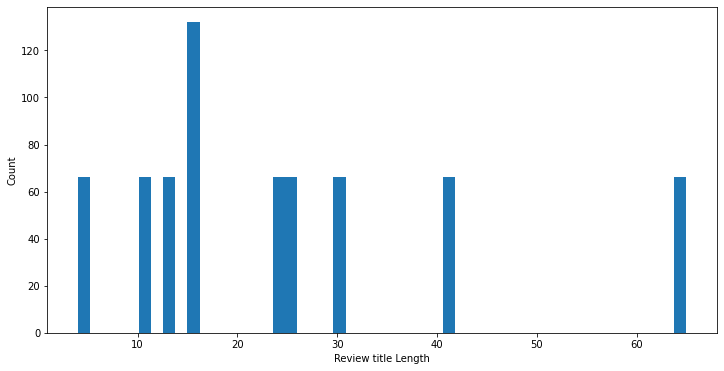

In [91]:
#review_length_title Visualizations
review_length_distribution_plt = pd.DataFrame(df["title"].str.len())
review_length_distribution_plt = review_length_distribution_plt[review_length_distribution_plt.title < 5000]
review_length_distribution_plt.groupby(["title"])
review_length_distribution_plt = review_length_distribution_plt.plot(kind='hist', 
                                                                     legend=None, 
                                                                     bins=50, 
                                                                     figsize=(12, 6))
review_length_distribution_plt.set_xlabel("Review title Length")
review_length_distribution_plt.set_ylabel("Count")

In [31]:
pip install nltk==3.3

  Created wheel for nltk: filename=nltk-3.3-py3-none-any.whl size=1394474 sha256=16d7e832f794afa72f52b3c4ceec3266ecf1b488810fe461ac4bbd1705525d9e
  Stored in directory: c:\users\xiong jiang\appdata\local\pip\cache\wheels\19\1d\3a\0a8c14c30132b4f9ffd796efbb6746f15b3d6bcfc1055a9346
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.5Note: you may need to restart the kernel to use updated packages.

    Uninstalling nltk-3.5:
      Successfully uninstalled nltk-3.5


In [32]:
import nltk

In [33]:
 nltk.download([
     "names",
     "stopwords",
     "state_union",
     "twitter_samples",
     "movie_reviews",
     "averaged_perceptron_tagger",
     "vader_lexicon",
     "punkt",
 ])

[nltk_data] Downloading package names to C:\Users\XIONG
[nltk_data]     JIANG\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\names.zip.
[nltk_data] Downloading package stopwords to C:\Users\XIONG
[nltk_data]     JIANG\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package state_union to C:\Users\XIONG
[nltk_data]     JIANG\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\state_union.zip.
[nltk_data] Downloading package twitter_samples to C:\Users\XIONG
[nltk_data]     JIANG\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\twitter_samples.zip.
[nltk_data] Downloading package movie_reviews to C:\Users\XIONG
[nltk_data]     JIANG\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\XIONG JIANG\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[n

True

In [60]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [93]:
#sentiment analysis
import nltk
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt


from nltk.corpus import stopwords



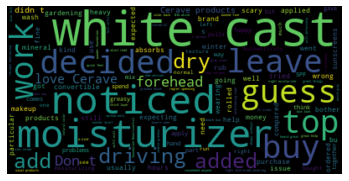

In [125]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href","product","put","sunscreen"])
textt = " ".join(review for review in df.body)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [94]:
# assign reviews with score > 3 as positive sentiment
# score < 3 negative sentiment
# remove score = 3
df = df[df['rating'] != 3]
df['sentiment'] = df['rating'].apply(lambda rating : +1 if rating > 3 else -1)

In [95]:
df.head

<bound method NDFrame.head of                                                  title  rating  \
0                                     Don’t recommend!     1.0   
2    Spreads evenly and washes off easily but does ...     5.0   
4                                                 Icky     1.0   
5                             Excellent face sunscreen     5.0   
6                       hard to wear under moisturizer     4.0   
..                                                 ...     ...   
655                           Excellent face sunscreen     5.0   
656                     hard to wear under moisturizer     4.0   
657                                        Recommended     5.0   
658                                      Probably fake     1.0   
659          white cast, drying, thick & tacky texture     1.0   

                                                  body  sentiment  
0    Don’t get me wrong, I love Cerave products. I ...         -1  
2    I ordered the CeraVe sunscreen becau

In [127]:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

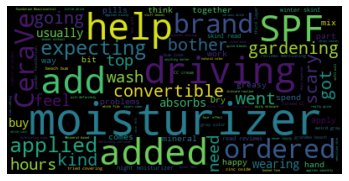

In [128]:
#Wordcloud — positive Sentiment
stopwords = set(STOPWORDS)
stopwords.update(["br", "href","good","great","product","put","sunscreen"]) 
## good and great removed because they were included in negative sentiment
pos = " ".join(review for review in positive.body)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

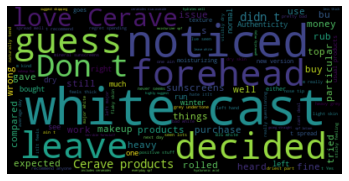

In [129]:
#Wordcloud —negative Sentiment
neg = " ".join(review for review in negative.body)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()

In [99]:
# distribution of reviews with sentiment across the dataset
df['sentimentt'] = df['sentiment'].replace({-1 : 'negative'})
df['sentimentt'] = df['sentimentt'].replace({1 : 'positive'})
fig = px.histogram(df, x="sentimentt")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()

In [100]:
# Building the Model for future prediction
# cleaning the data
   
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final
df['body'] = df['body'].apply(remove_punctuation)



In [101]:
#Split the Dataframe
dfNew = df[['body','sentiment']]
dfNew.head()

,body,sentiment
0,"Don’t get me wrong, I love Cerave products I h...",-1
2,I ordered the CeraVe sunscreen because I like ...,1
4,Ive seen lots of positive stuff about this par...,-1
5,Product applies smoothly and absorbs in a few ...,1
6,I added this SPF as part of my daily skincare ...,1


In [102]:
# random split train and test data
index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

In [103]:
# count vectorizer:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['body'])
test_matrix = vectorizer.transform(test['body'])

In [104]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [105]:
#Split target and independent variables
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

In [106]:
#Fit model on data
lr.fit(X_train,y_train)

LogisticRegression()

In [107]:
#Make predictions
predictions = lr.predict(X_test)

In [108]:
#Testing
# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[62,  0],
       [ 0, 55]], dtype=int64)

In [109]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        55

    accuracy                           1.00       117
   macro avg       1.00      1.00      1.00       117
weighted avg       1.00      1.00      1.00       117

